# Exponential Smoothing

Here we see Exponential smoothing. The idea is to forcast future values using all previous values in the series.

## 1. Simple Exponential smoothing

Forcast a series with **no trend** and **no seasonality**

Forcast=estimated level at most recent time point $F_{t+k}=L_t$

Level updating equation: $L_t=\alpha Y_t+(1-\alpha)L_{t-1}$

where $\alpha$=smoothing constant, $0\le\alpha\le1$

Algorithm learns the new level from latest data, it's exponential because we can also write it as below:

$L_t=\alpha Y_t+(1-\alpha)L_{t-1}\\ 
\quad=\alpha Y_t+ \alpha(1-\alpha)Y_{t-1}+(1-\alpha)^2 L_{t-2}\\
\quad=\alpha Y_t+ \alpha(1-\alpha)Y_{t-1}+\alpha(1-\alpha)^2Y_{t-2}+...$

Weights are decreasing exponentially. We can see if $\alpha=1$ past values have no influence over forcasting (under-smoothing). Where as if  $\alpha=0$ past values have equal influence on forcasting (over-smoothing). That is why $\alpha$ is always between 0 and 1. (typically 0.1 or 0.2)

We can see the decrease effect of alpha:

In [1]:
alpha=c(0.9,0.5,0.2,0.1)
ls=c()
for (i in 1:4){
    a=alpha[i]
    newls=c(a,a*(1-a),a*(1-a)**2,a*(1-a)**3)
    ls<-rbind(ls,newls)
}
ls

newls,0.9,0.09,0.009,0.0009
newls,0.5,0.25,0.125,0.0625
newls,0.2,0.16,0.128,0.1024
newls,0.1,0.09,0.081,0.0729


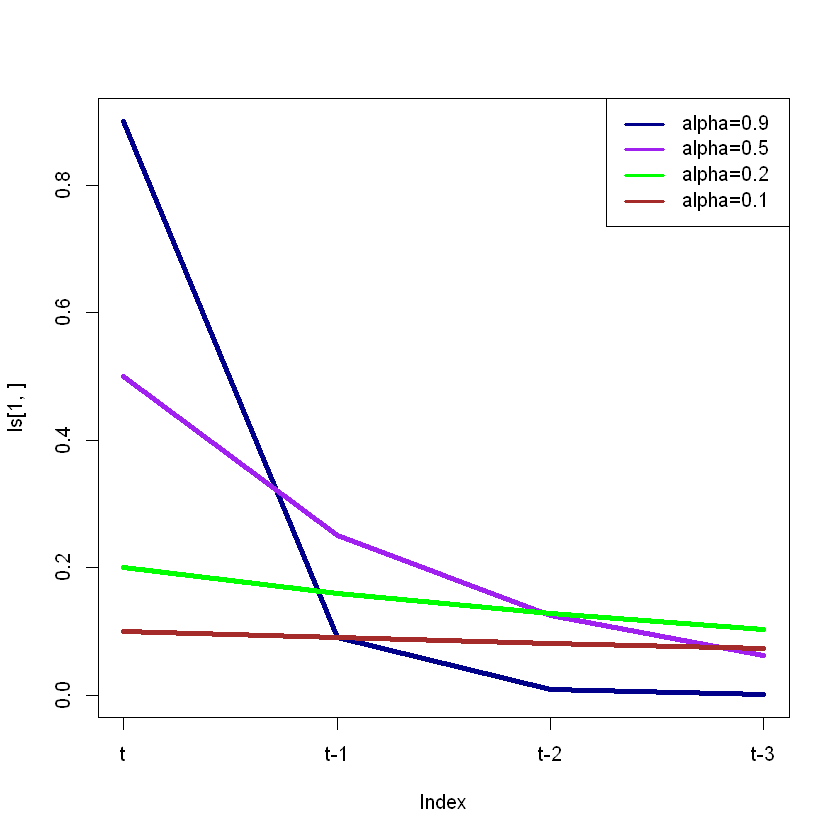

In [2]:
legend=c('alpha=0.9','alpha=0.5','alpha=0.2','alpha=0.1')
color=c('darkblue','purple','green','brown')
plot(ls[1,],type='l',lwd=4,xaxt='n',col=color[1])
lines(ls[2,],type='l',lwd=4,xaxt='n',col=color[2])
lines(ls[3,],type='l',lwd=4,xaxt='n',col=color[3])
lines(ls[4,],type='l',lwd=4,xaxt='n',col=color[4])
axis(1, at = 1:4, labels = c("t",'t-1','t-2','t-3'))
legend('topright',legend=legend,col = color,lty=1,lwd=3)

**Comment:**

They all decrease as we go further to the past, but with alpha large it decreases very fast then others.

Although it's like Moving average (it depends all the previous time periode data) but unlike MA, SES gives more weight to more recent observations

## 2. Holt's (double) exponential smoothing

For series with trend, no seasonality

Forcast=estimated leve + trend at most recent time point $F_{t+k}=L_t+kT_t$

**Equation 1: updating the level**

$L_t=\alpha Y_t+(1-\alpha)(L_{t-1}+T_{t-1})$

**Equation 2: Updating the trend**

$T_t=\beta(L_t-L{t-1}+(1-\beta)T_{t-1}$

here it is we updata the previous trend using the difference between the most recent level values

**Note that we should identify first the trend of the data**

* Additive trend

Forcast=most recent estimated level + estimated trend $F_{t+k}=L_t+kT_t$

* Multiplicative trend

Forcast=most recent estimated level \* estimated trend $F_{t+k}=L_t(T_t)^k$


## 3. Winter's (Advanced) exponential smoothing

For series with trend and seasonality

Forcast=estimated level+trend+seasonality at most recent time point
$F_{t+k}=L_t+kT_t+S_{t+k-M}$

* Additive seasonality

$F_{t+k}=L_t+kT_t+S_{t+k-M}$

* Multiplicative seasonality

$F_{t+k}=(L_t+kT_t)S_{t+k-M}$

*Note that here we use additive trend the trend can be adjusted to multiplicative trend as well*

**Equation 1: Level**
we use de-seasonalized Y

$$L_t=\alpha \frac{Y_t}{S_{t-M}}+(1-\alpha)(L_{t-1}+T_{t-1})$$

**Equation 2: Trend** (same as Holt's)(additive trend)

$$T_t=\beta(L_t-L{t-1}+(1-\beta)T_{t-1}$$

**Equation 3: Seasonality** (Multiplicative seasonality) we use de-trended Y

$$S_t=\gamma \frac{Y_t}{L_t}+(1-\gamma)S_{t-M}$$


## 4. Exercise for exponential smoothing



In [3]:
#create 3 time series
t=seq(1,120)
x1=ts(rnorm(1200),frequency=4)
x2=ts(0.5*t+2*rnorm(120),frequency = 4)
x3=ts(0.5*t+rnorm(120)+3*cos(t*pi/6),frequency = 4)

From the ploting we can see that only x1 is stationary

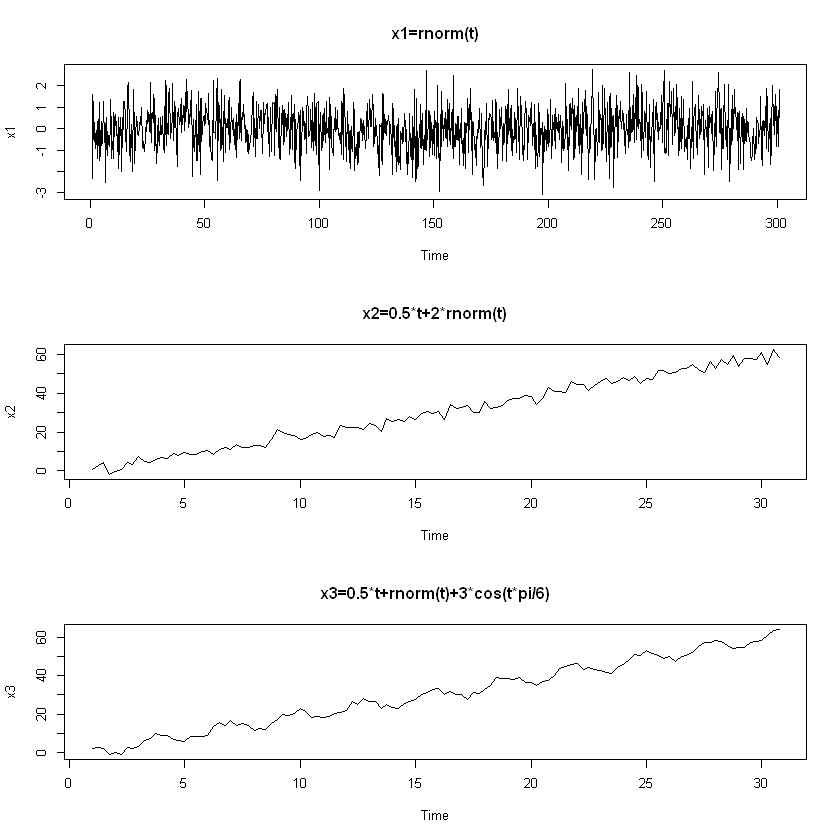

In [4]:
#plot 3 plot
par(mfrow=c(3,1))
ts.plot(x1,main='x1=rnorm(t)')
ts.plot(x2,main='x2=0.5*t+2*rnorm(t)')
ts.plot(x3,main='x3=0.5*t+rnorm(t)+3*cos(t*pi/6)')

### 4.1 Simple Exponential Smoothing (SES)

**X1**

* First we try with different alpha

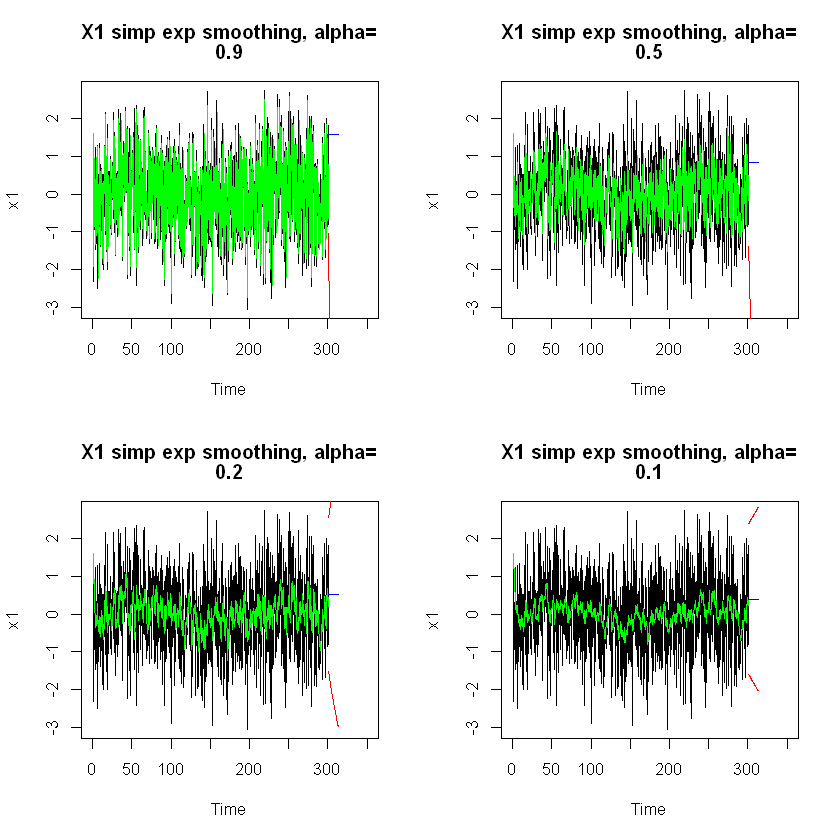

In [5]:
alphas <- c(0.9, 0.5, 0.2, 0.1)
par(mfrow=c(2,2))
for(a in alphas){
    ses<-HoltWinters(x1,alpha = a,beta=FALSE,gamma=FALSE)
    pses<-predict(ses,n.ahead=50,prediction.interval = TRUE)   
    plot(x1,main=c("X1 simp exp smoothing, alpha=",a),xlim=c(0,350))
    lines(ses$fitted[,1],col='green')
    lines(pses[,1],col='blue')
    lines(pses[,2],col='red')
    lines(pses[,3],col='red')
    ses
}

Holt-Winters exponential smoothing with trend and additive seasonal component.

Call:
HoltWinters(x = x1)

Smoothing parameters:
 alpha: 0.05422885
 beta : 0.03451938
 gamma: 0.05520072

Coefficients:
          [,1]
a  -0.17960659
b   0.01192281
s1  0.34860184
s2  0.46466722
s3  0.62307675
s4  0.67953403

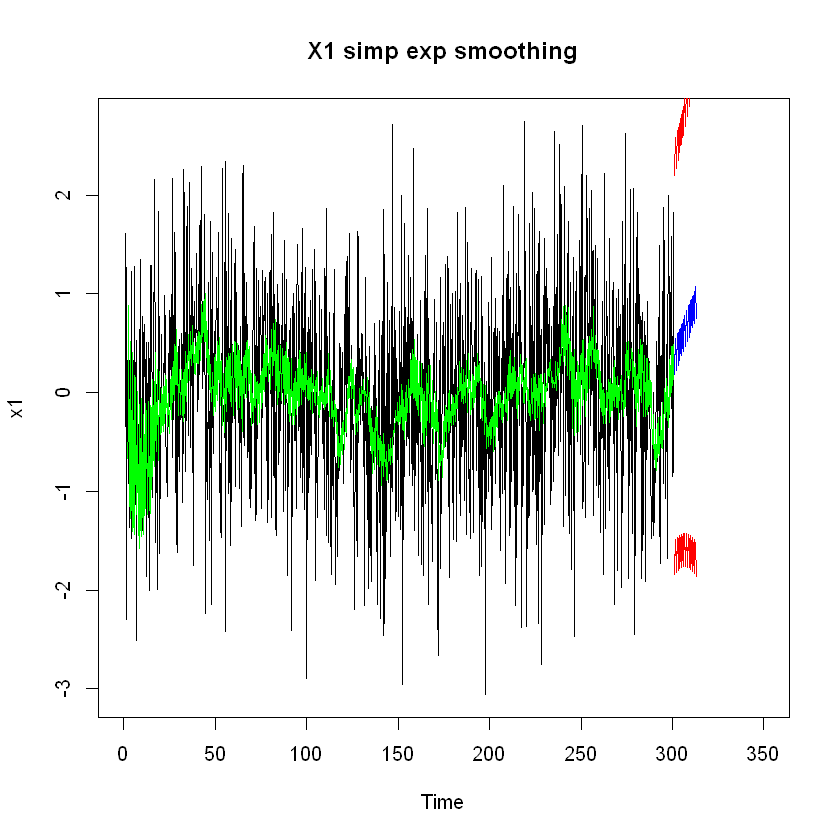

In [6]:
ses<- HoltWinters(x1)
pses<-predict(ses,n.ahead=50,prediction.interval = TRUE)
plot(x1,main="X1 simp exp smoothing",xlim=c(0,350))
lines(ses$fitted[,1],col='green')
lines(pses[,1],col='blue')
lines(pses[,2],col='red')
lines(pses[,3],col='red')
ses

Holt-Winters exponential smoothing with trend and additive seasonal component.

Call:
HoltWinters(x = x2)

Smoothing parameters:
 alpha: 0.1300463
 beta : 0.1367244
 gamma: 0.2130762

Coefficients:
         [,1]
a  58.6900569
b   0.4576291
s1  1.3117135
s2  0.4394983
s3  1.4326611
s4  1.5345866

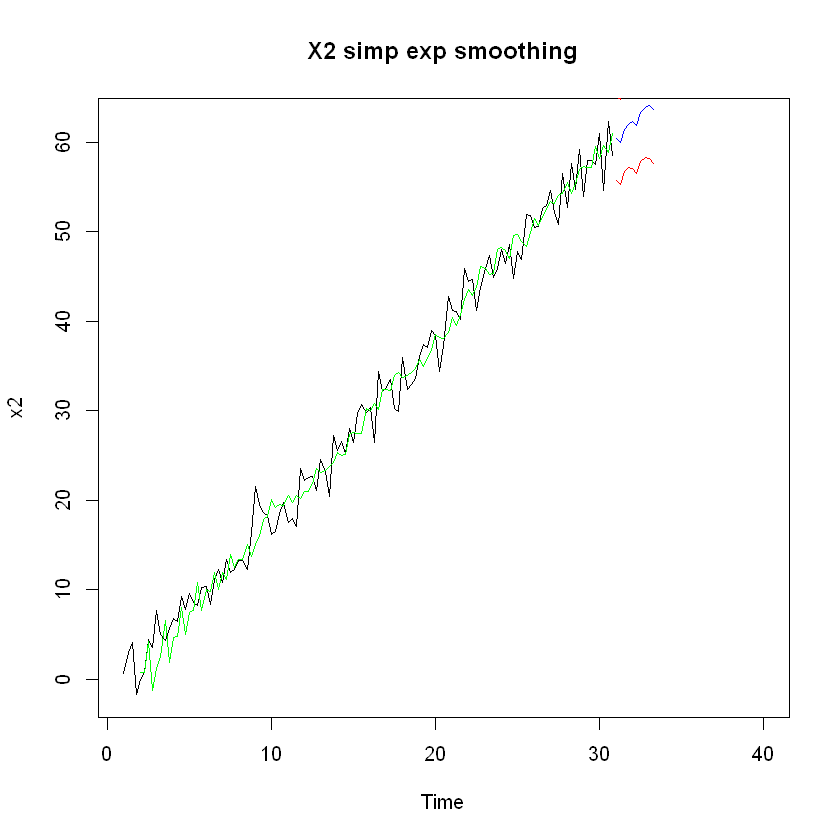

In [7]:
ses<- HoltWinters(x2)
pses<-predict(ses,n.ahead=10,prediction.interval = TRUE)
plot(x2,main="X2 simp exp smoothing",xlim=c(1,40))
lines(ses$fitted[,1],col='green')
lines(pses[,1],col='blue')
lines(pses[,2],col='red')
lines(pses[,3],col='red')
ses

Holt-Winters exponential smoothing with trend and additive seasonal component.

Call:
HoltWinters(x = x3)

Smoothing parameters:
 alpha: 0.885211
 beta : 0.03058771
 gamma: 1

Coefficients:
         [,1]
a  63.0848145
b   0.5883254
s1  0.9187131
s2  0.7360413
s3  1.1494759
s4  0.6907450

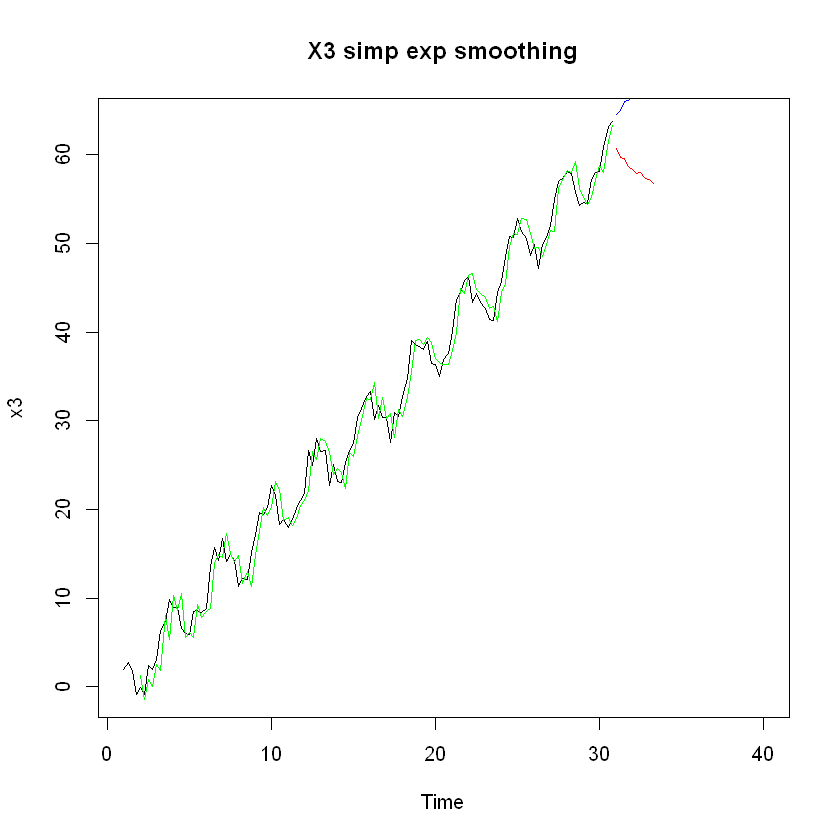

In [8]:
ses<- HoltWinters(x3)
pses<-predict(ses,n.ahead=10,prediction.interval = TRUE)
plot(x3,main="X3 simp exp smoothing",xlim=c(1,40))
lines(ses$fitted[,1],col='green')
lines(pses[,1],col='blue')
lines(pses[,2],col='red')
lines(pses[,3],col='red')
ses